![Cabecera](img/img1.jpg)
# Predicción del Precio de la Electricidad
#### 1. [Introducción](#id1)
#### 2. [Carga de datos y limpieza de missings](#id2)
#### 3. [Train y Test](#id3)
#### 4. [Análisis Univariante](#id4)
#### 5. [Análisis Bivariante](#id5)
#### 6. [Tratamiento de Outliers](#id6)


<div id='id1' />

## 1.Introducción

El precio mayorista de la electricidad es una variable clave dentro de los mercados energéticos. Su evolución diaria depende de 
múltiples factores, entre los que destaca la composición del mix energético utilizado para cubrir la demanda: tecnologías renovables 
(eólica, solar, hidráulica), generación térmica, ciclos combinados, nuclear, entre otras. Cada tecnología presenta costes marginales 
distintos, lo que influye directamente en el precio final de casación en el mercado eléctrico.

En este contexto, contar con herramientas capaces de predecir el precio de la electricidad se vuelve esencial para agentes del sector 
energético, comercializadoras, operadores de red y consumidores industriales.

**Objetivo del Proyecto**

El propósito de este proyecto es desarrollar un modelo de regresión basado en técnicas de Machine Learning que permita estimar el 
precio diario de la electricidad a partir del mix energético disponible. Este modelo se entrenará utilizando datos históricos que 
incluyan:
- La contribución de cada tecnología al mix energético diario.
- Precio resultante en el mercado mayorista.

El objetivo final es construir un modelo capaz de anticipar el comportamiento del precio, facilitando la toma de decisiones 
estratégicas y mejorando la gestión operativa dentro del mercado.

**Enfoque Metodológico**

Para ello, el proyecto comprende las siguientes fases:

- *Recopilación y limpieza de datos*
Reunir los datos históricos del mercado eléctrico y preprocesarlos para eliminar inconsistencias y valores atípicos.

- *Análisis exploratorio (EDA)*
Examinar la distribución del mix energético, la variabilidad de los precios y las relaciones entre variables.

- *Selección y construcción del modelo*
Probar diferentes modelos de regresión y optimizar hiperparámetros para mejorar el rendimiento.

- *Evaluación del rendimiento*
Utilizar métricas como R², MAE o RMSE  para valorar la capacidad predictiva del modelo.

- *Interpretación y conclusiones*
Identificar qué tecnologías o factores del mix energético impactan más en el precio.

**Resultados Esperados**

Se espera obtener un modelo robusto que permita:

- Predecir el precio de la electricidad con un margen de error reducido.
- Detectar patrones entre el mix energético y la formación de precios.
- Servir como herramienta de apoyo para planificación energética, negociación y análisis de escenarios.

<div id='id2' />

## 2. Carga de datos y limpieza de missings
Cargaremos los datos a partir de los archivos obtenidos de la API de ESIOS que obtuvimos en el notebook [01_Fuentes]('01_Fuentes.ipynb').

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import bootcampviztools as bt
import plotly.express as px
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy.stats import boxcox

Cargamos los datos de generación energética:

In [37]:
# Cargamos el mix energético
mix_energetico = pd.read_csv('../data/raw/mix_generacion.csv')
mix_energetico['datetime'] = mix_energetico['datetime'].astype('string')
mix_energetico['date'] = mix_energetico['datetime'].str[:10]
# Visualizamos
display(mix_energetico)

,datetime,eolica,nuclear,carbon,ciclo_combinado,hidraulica,solar_fotovoltaica,solar_termica,cogeneracion,exportacion_andorra,exportacion_marruecos,exportacion_portugal,exportacion_francia,importacion_francia,importacion_portugal,importacion_marruecos,importacion_andorra,date
0,2021-11-01T00:00:00.000+01:00,12493.159973,5948.341250,299.383667,1825.547833,945.051167,1563.366871,117.833020,2477.111178,-18.683333,-115.004167,-1907.162292,-1153.521000,559.300208,58.650667,9.512500,0.000000,2021-11-01
1,2021-11-02T00:00:00.000+01:00,12150.013304,5956.375792,664.046125,4566.936583,1221.170950,1294.158505,75.014419,2897.422667,-38.587500,-135.750000,-962.321667,-2473.546417,5.696708,375.757333,10.616667,0.000000,2021-11-02
2,2021-11-03T00:00:00.000+01:00,9925.602208,5939.067417,715.790458,6002.419542,1426.251125,2122.050266,442.891079,3017.893083,-31.330417,-161.029167,-681.804833,-2325.660958,54.540917,473.279708,10.933333,0.000000,2021-11-03
3,2021-11-04T00:00:00.000+01:00,7062.424833,5953.872542,800.601958,7648.385208,1319.968208,2399.781061,795.615029,3115.328708,-44.929167,-173.958333,-797.112542,-1519.628583,153.841333,550.443125,8.929167,0.000000,2021-11-04
4,2021-11-05T00:00:00.000+01:00,9802.025417,5959.269375,776.796792,5684.690042,1374.540042,2637.744410,832.004616,3229.385875,-24.820833,-121.783333,-777.858083,-2101.294667,46.103792,432.622542,15.475000,0.000000,2021-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2025-10-27T00:00:00.000+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.482917,-640.071000,-1810.340333,-11.596500,1542.266167,191.552750,3.411000,0.000000,2025-10-27
1457,2025-10-28T00:00:00.000+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.195417,-725.859000,-1857.913000,-10.042417,2019.321667,84.023750,0.000000,0.016667,2025-10-28
1458,2025-10-29T00:00:00.000+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.669167,-798.363000,-2529.647000,-10.160125,1945.925875,22.883000,0.000000,0.000000,2025-10-29
1459,2025-10-30T00:00:00.000+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.118333,-543.834000,-2288.995333,-28.524833,1594.056292,140.552875,6.075000,0.000000,2025-10-30


Cargamos los precios diarios:

In [38]:
# Cargamos el precio diario
precio = pd.read_csv('../data/raw/precio.csv')

# Visualizamos
display(precio)

,date,value
0,2021-10-31,78.430000
1,2021-11-01,92.557917
2,2021-11-02,147.430417
3,2021-11-03,155.072917
4,2021-11-04,171.834167
...,...,...
1457,2025-10-27,90.611250
1458,2025-10-28,100.705521
1459,2025-10-29,106.076875
1460,2025-10-30,88.773750


Cruzamos los dos dataframes:


In [39]:
# Juntamos los dos datasets en uno solo
df = mix_energetico.merge(precio, on="date", how="left")

df.to_csv('../data/processed/df_final.csv', index=False)

# Cambio el nombre del precio
df.rename(columns={'value': 'target'}, inplace=True)

# visualizamos
display(df)

,datetime,eolica,nuclear,carbon,ciclo_combinado,hidraulica,solar_fotovoltaica,solar_termica,cogeneracion,exportacion_andorra,exportacion_marruecos,exportacion_portugal,exportacion_francia,importacion_francia,importacion_portugal,importacion_marruecos,importacion_andorra,date,target
0,2021-11-01T00:00:00.000+01:00,12493.159973,5948.341250,299.383667,1825.547833,945.051167,1563.366871,117.833020,2477.111178,-18.683333,-115.004167,-1907.162292,-1153.521000,559.300208,58.650667,9.512500,0.000000,2021-11-01,92.557917
1,2021-11-02T00:00:00.000+01:00,12150.013304,5956.375792,664.046125,4566.936583,1221.170950,1294.158505,75.014419,2897.422667,-38.587500,-135.750000,-962.321667,-2473.546417,5.696708,375.757333,10.616667,0.000000,2021-11-02,147.430417
2,2021-11-03T00:00:00.000+01:00,9925.602208,5939.067417,715.790458,6002.419542,1426.251125,2122.050266,442.891079,3017.893083,-31.330417,-161.029167,-681.804833,-2325.660958,54.540917,473.279708,10.933333,0.000000,2021-11-03,155.072917
3,2021-11-04T00:00:00.000+01:00,7062.424833,5953.872542,800.601958,7648.385208,1319.968208,2399.781061,795.615029,3115.328708,-44.929167,-173.958333,-797.112542,-1519.628583,153.841333,550.443125,8.929167,0.000000,2021-11-04,171.834167
4,2021-11-05T00:00:00.000+01:00,9802.025417,5959.269375,776.796792,5684.690042,1374.540042,2637.744410,832.004616,3229.385875,-24.820833,-121.783333,-777.858083,-2101.294667,46.103792,432.622542,15.475000,0.000000,2021-11-05,172.337083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2025-10-27T00:00:00.000+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.482917,-640.071000,-1810.340333,-11.596500,1542.266167,191.552750,3.411000,0.000000,2025-10-27,90.611250
1457,2025-10-28T00:00:00.000+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.195417,-725.859000,-1857.913000,-10.042417,2019.321667,84.023750,0.000000,0.016667,2025-10-28,100.705521
1458,2025-10-29T00:00:00.000+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.669167,-798.363000,-2529.647000,-10.160125,1945.925875,22.883000,0.000000,0.000000,2025-10-29,106.076875
1459,2025-10-30T00:00:00.000+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.118333,-543.834000,-2288.995333,-28.524833,1594.056292,140.552875,6.075000,0.000000,2025-10-30,88.773750


In [40]:
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   datetime               1461 non-null   datetime64[ns, UTC]
 1   eolica                 1445 non-null   float64            
 2   nuclear                1445 non-null   float64            
 3   carbon                 1445 non-null   float64            
 4   ciclo_combinado        1445 non-null   float64            
 5   hidraulica             1445 non-null   float64            
 6   solar_fotovoltaica     1445 non-null   float64            
 7   solar_termica          1445 non-null   float64            
 8   cogeneracion           1445 non-null   float64            
 9   exportacion_andorra    1461 non-null   float64            
 10  exportacion_marruecos  1461 non-null   float64            
 11  exportacion_portugal   1461 non-null   float64          

In [41]:
df.describe().to_csv('../data/processed/descripcion_datos.csv')

Vemos que hay varios missings, vamos a tratarlos:

In [42]:
filas_con_missings = df.isnull().any(axis=1)
df_missings = df[filas_con_missings]
df_missings

,datetime,eolica,nuclear,carbon,ciclo_combinado,hidraulica,solar_fotovoltaica,solar_termica,cogeneracion,exportacion_andorra,exportacion_marruecos,exportacion_portugal,exportacion_francia,importacion_francia,importacion_portugal,importacion_marruecos,importacion_andorra,date,target
1445,2025-10-15 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.556667,-581.346000,-2443.695917,-15.497958,1705.493417,54.695000,0.13500,0.000000,2025-10-16,111.726771
1446,2025-10-16 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.521250,-582.633000,-2639.899292,-151.631958,1173.614917,171.145333,1.20600,0.000000,2025-10-17,108.937292
1447,2025-10-17 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.118750,-562.761000,-2483.507917,-706.018875,1218.312417,5.007500,0.59400,0.000000,2025-10-18,77.671354
1448,2025-10-18 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.210417,-447.201000,-1642.426875,-839.908208,999.433375,73.648375,1.23300,0.000000,2025-10-19,29.291771
1449,2025-10-19 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28.340417,-539.640000,-2368.957000,-623.002875,1023.761792,41.501042,0.46800,0.000000,2025-10-20,41.051354
1450,2025-10-20 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.339583,-765.243000,-1771.674417,-1035.882458,630.159292,267.113833,0.00000,0.000000,2025-10-21,38.714375
1451,2025-10-21 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-31.995833,-699.534000,-1697.333708,-974.146917,186.688125,270.986250,0.00000,0.000000,2025-10-22,25.506875
1452,2025-10-22 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.025833,-795.725958,-1805.263458,-786.913792,577.992458,199.737917,0.00000,0.000000,2025-10-23,32.792813
1453,2025-10-23 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-32.055833,-804.690042,-1547.376167,-10.982708,2016.683083,184.082125,0.00000,0.000000,2025-10-24,95.776250
1454,2025-10-24 22:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-36.033333,-780.021000,-2221.398375,-0.209458,2119.480750,51.016917,0.00000,0.000000,2025-10-25,81.466042


Se trata de las ultimas entradas, no tenemos datos de generación pero sí de las exportaciones e importaciones. Puede ser que los datos no estén actualizados o disponibles todavía.   
Procedemos a deshacernos de ellos ya que no nos servirán para entrenar modelos y tenemos suficientes datos.

In [43]:
df.dropna(inplace=True)
display(df)

,datetime,eolica,nuclear,carbon,ciclo_combinado,hidraulica,solar_fotovoltaica,solar_termica,cogeneracion,exportacion_andorra,exportacion_marruecos,exportacion_portugal,exportacion_francia,importacion_francia,importacion_portugal,importacion_marruecos,importacion_andorra,date,target
0,2021-10-31 23:00:00+00:00,12493.159973,5948.341250,299.383667,1825.547833,945.051167,1563.366871,117.833020,2477.111178,-18.683333,-115.004167,-1907.162292,-1153.521000,559.300208,58.650667,9.512500,0.0,2021-11-01,92.557917
1,2021-11-01 23:00:00+00:00,12150.013304,5956.375792,664.046125,4566.936583,1221.170950,1294.158505,75.014419,2897.422667,-38.587500,-135.750000,-962.321667,-2473.546417,5.696708,375.757333,10.616667,0.0,2021-11-02,147.430417
2,2021-11-02 23:00:00+00:00,9925.602208,5939.067417,715.790458,6002.419542,1426.251125,2122.050266,442.891079,3017.893083,-31.330417,-161.029167,-681.804833,-2325.660958,54.540917,473.279708,10.933333,0.0,2021-11-03,155.072917
3,2021-11-03 23:00:00+00:00,7062.424833,5953.872542,800.601958,7648.385208,1319.968208,2399.781061,795.615029,3115.328708,-44.929167,-173.958333,-797.112542,-1519.628583,153.841333,550.443125,8.929167,0.0,2021-11-04,171.834167
4,2021-11-04 23:00:00+00:00,9802.025417,5959.269375,776.796792,5684.690042,1374.540042,2637.744410,832.004616,3229.385875,-24.820833,-121.783333,-777.858083,-2101.294667,46.103792,432.622542,15.475000,0.0,2021-11-05,172.337083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,2025-10-10 22:00:00+00:00,4836.309028,4923.256375,0.001000,4885.862042,1874.977375,7373.148427,679.658225,1932.291551,-6.916250,-539.757000,-1520.190125,-739.249667,794.750958,122.442417,1.053000,0.0,2025-10-11,73.473750
1441,2025-10-11 22:00:00+00:00,4893.946934,4919.895417,0.001000,5447.005458,1768.047125,6357.593301,538.839935,1737.309831,-6.894167,-449.037000,-2309.840000,-415.607083,815.077542,3.693500,9.144000,0.0,2025-10-12,64.083750
1442,2025-10-12 22:00:00+00:00,2067.821604,4932.719083,117.953000,8562.589051,2863.017083,7551.436986,525.623258,1946.487581,-7.620417,-450.405000,-2315.239083,-96.187083,1253.808542,90.586500,58.383000,0.0,2025-10-13,104.003125
1443,2025-10-13 22:00:00+00:00,1001.990569,4944.108988,168.886750,9848.333514,3051.650304,7802.154108,654.034743,2040.677731,-7.687917,-555.894000,-2268.043083,-97.856417,1171.155167,82.675625,0.621000,0.0,2025-10-14,110.624271


Vamos a ver cómo evoluciona en precio para detectar anomalías:

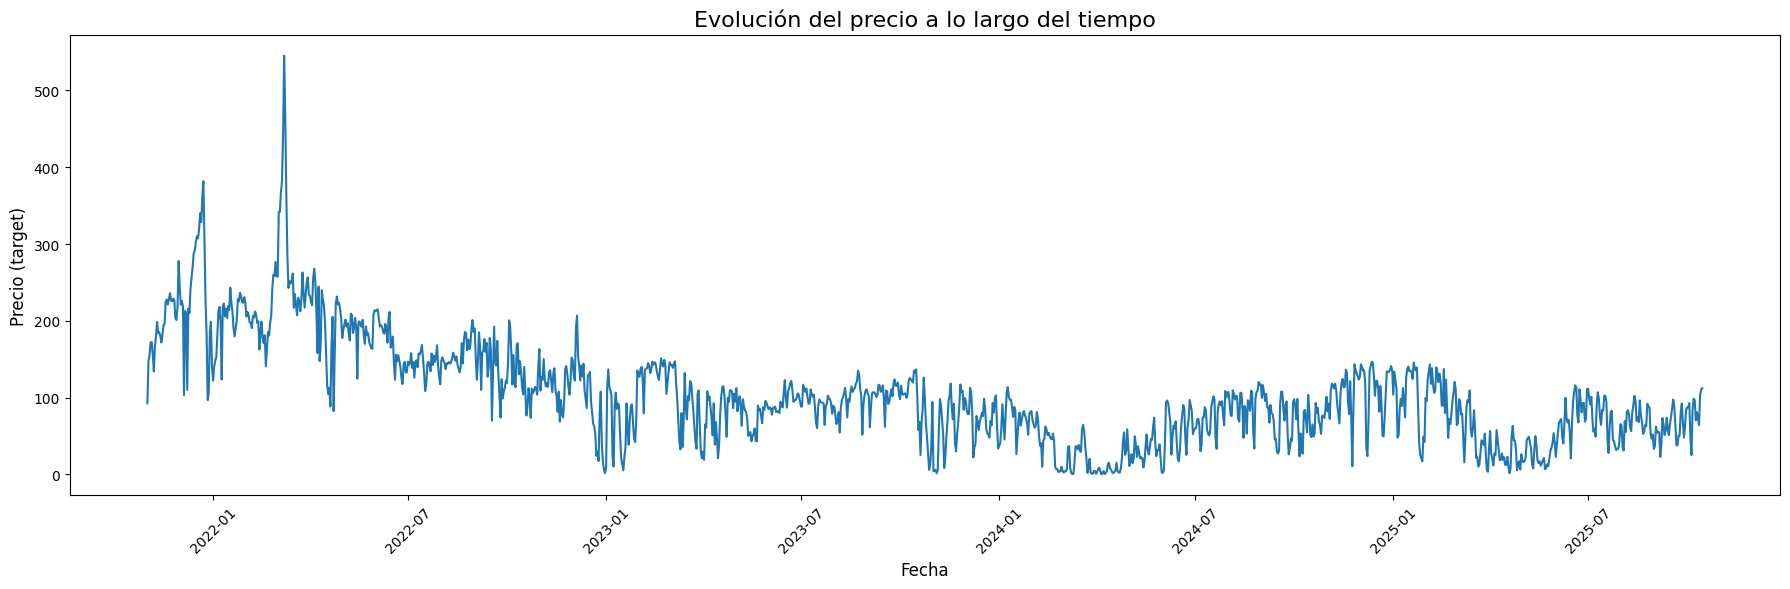

In [44]:
plt.figure(figsize=(18, 6))

sns.lineplot(
    data=df,
    x= df['datetime'],
    y='target')

plt.title("Evolución del precio a lo largo del tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio (target)", fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Vemos que hay un pico en el año 2022:

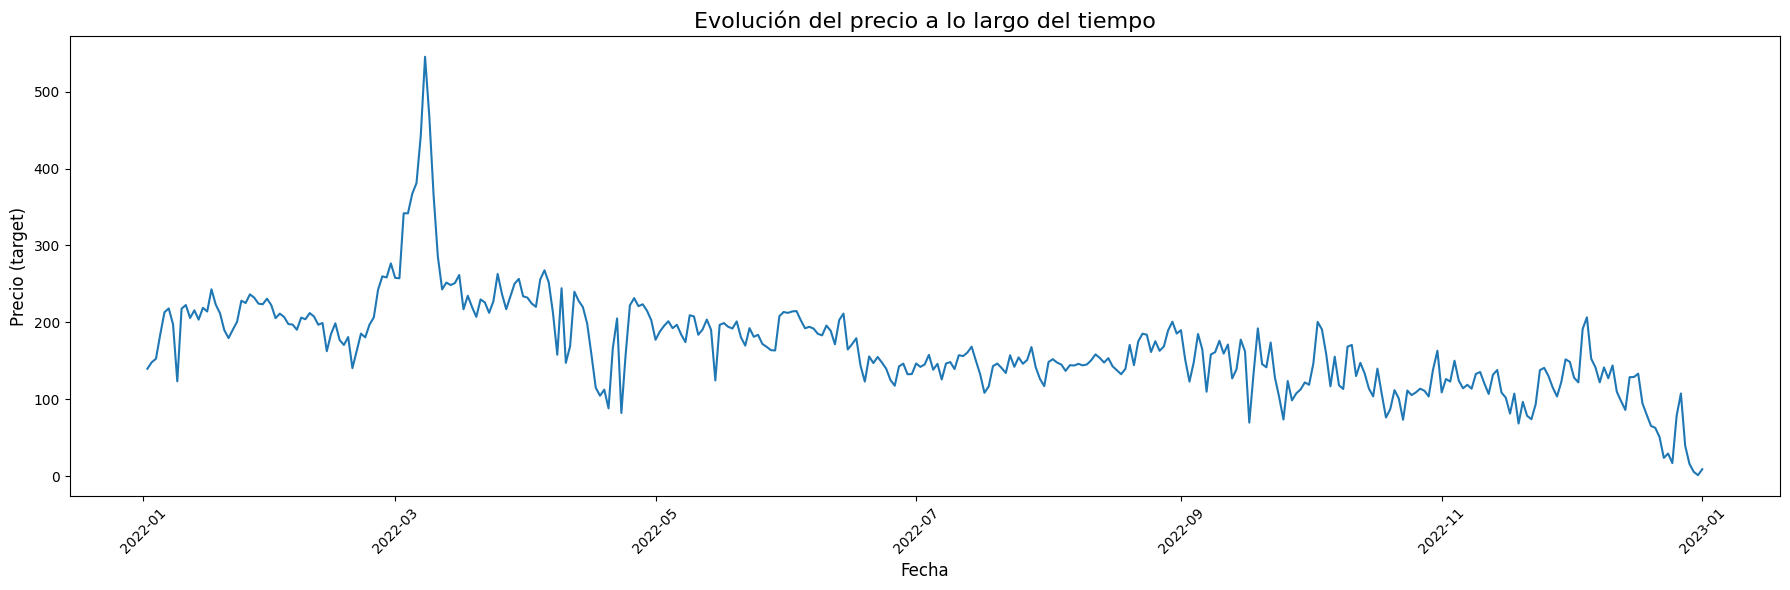

In [45]:
plt.figure(figsize=(18, 6))

sns.lineplot(
    data=df,
    x= df['datetime'][df['datetime'].dt.year == 2022],
    y='target')

plt.title("Evolución del precio a lo largo del tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio (target)", fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El pico se produce en marzo, en este periodo el precio del gas natural subió inusualmente debido a la inestabilidad por la [invasión rusa a Ucrania](https://www.rtve.es/noticias/20220330/marzo-mes-mas-caro-historia-precio-electricidad-luz/2325589.shtml). ![grafico](img/pico_marzo22.png)  
Vamos a eliminar el mes de marzo completo de los datos que es cuando se acentúa el pico. Asumiremos que nuestro modelo predictivo no es compatible con las politicas expansionistas.

In [46]:
df = df[~((df['datetime'].dt.year == 2022) & (df['datetime'].dt.month == 3))]
df.reset_index(drop=True, inplace=True)

Lo que queremos no es un análisis estacional, queremos prececir el precio a partir del mix energético. Por esto, no volveremos a usar la columna 'datetime' y vamos a deshacernos de ella.

In [47]:
# Descartamos la columna datetime
df = df.drop(columns=['datetime','date'])

# Guardamos el dataframe 
df.to_csv('../data/processed/data.csv')

<div id='id3' />

## 3. Train y test
Separamos los datos aleatoriamente en dos sets: Train y Test.


In [48]:
# Separamos en train y test
train_set, test_set = train_test_split(df, test_size = 0.2, random_state=42)
train_set.to_csv('../data/train/train_set.csv')
test_set.to_csv('../data/test/test_set.csv')

<div id='id4' />

## 4. Análisis univariante:
Vamoms a analizar las variables incluidas en los datos.


### 4.1 Target: Precio mercado SPOT Diario (€/MWh)
El Mercado Diario es un mercado mayorista en el que se establecen transacciones de energía eléctrica para el día siguiente, mediante la presentación de ofertas de venta y adquisición de energía eléctrica por parte de los participantes en el mercado. 
Como resultado del mismo se determina de forma simultánea el precio del mercado diario en cada zona de oferta, los programas de toma y entrega de energía, y los programas de intercambio entre zonas de oferta.

(2,)


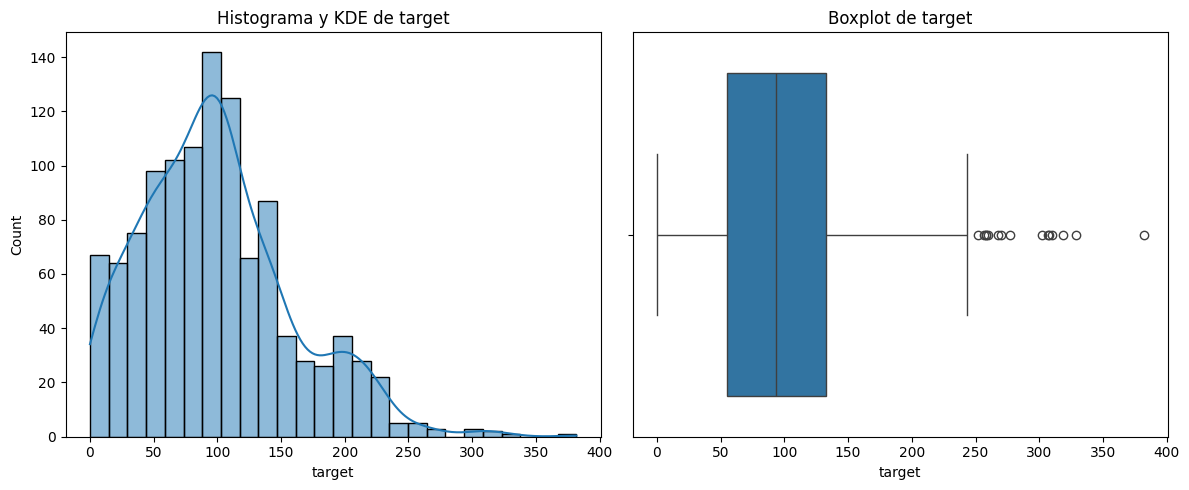

In [49]:
# Veamos como se distribuye el target
bt.plot_combined_graphs(train_set, ['target'])

In [50]:
train_set['target'].describe()

count    1131.000000
mean       98.777502
std        59.577597
min         0.066667
25%        54.696875
50%        93.735417
75%       132.611250
max       381.880000
Name: target, dtype: float64

La distribución del precio tiende a campana con un valor medio de 103.43 €/MWh. Sólo vemos dos outlayers por la derecha.
Los datos tienen de min 0.35 y de máximo 467.45. Veamos qué mix energético teníamos esos días:

C:\Users\user\AppData\Local\Temp\ipykernel_236\2258188873.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(
C:\Users\user\AppData\Local\Temp\ipykernel_236\2258188873.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(


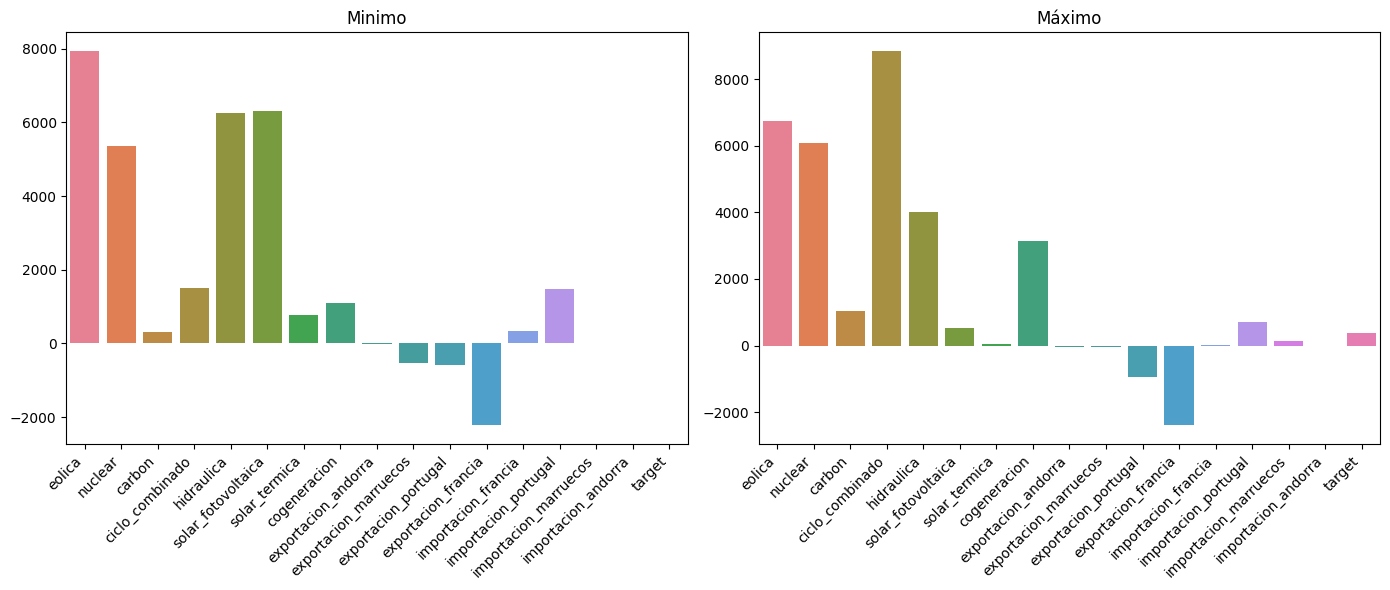

In [51]:
# Max y min de target

fig, (ax1, ax2) = plt.subplots(
    nrows=1, 
    ncols=2, 
    figsize=(14, 6))

sns.barplot(train_set.loc[train_set['target'] == train_set['target'].min()], ax=ax1)
ax1.set_xticklabels(
    ax1.get_xticklabels(), 
    rotation=45,          
    ha='right')   
ax1.set_title('Minimo')        

sns.barplot(train_set.loc[train_set['target'] == train_set['target'].max()], ax=ax2)
ax2.set_xticklabels(
    ax2.get_xticklabels(), 
    rotation=45,          
    ha='right',           
    )
ax2.set_title('Máximo')

plt.tight_layout() 
plt.show()

Observamos que cuando el precio fue minimo la generación de las energías renovables fue más alta, mientras que el precio máximo se fijó cuando la energía mayoritaria fue el ciclo combinado.

Veamos si con una transformación logarítmica se ve mejor la campana:

(2,)


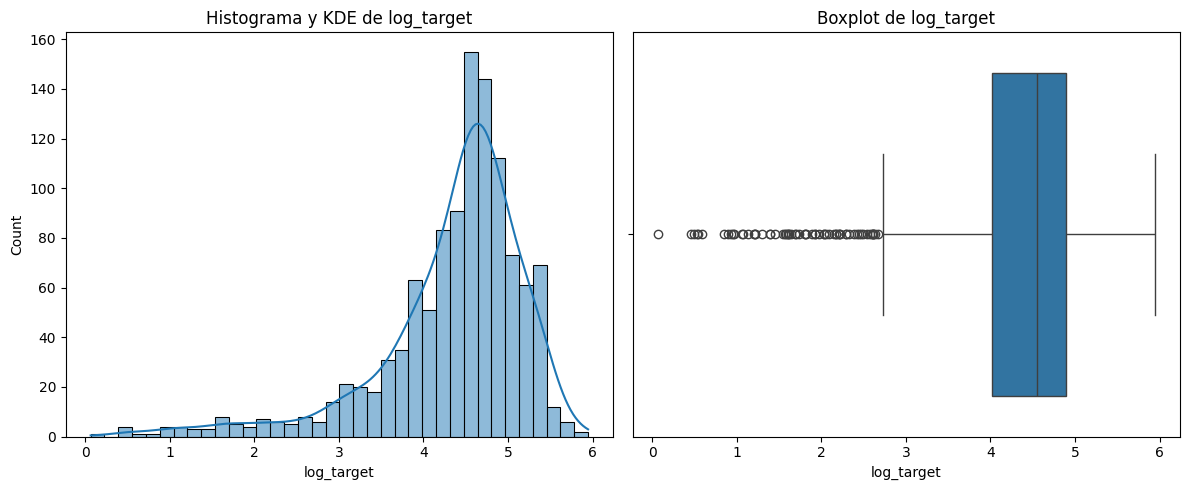

In [52]:
# Veamos como se distribuye el target con transformación logaritmica
train_set_copy = train_set.copy()
train_set_copy['log_target'] = np.log1p(train_set['target'])
bt.plot_combined_graphs(train_set_copy, ['log_target'])

No ha mejorado, probemos con una transformaciones de raiz cuadrada y cúbica:

(2,)


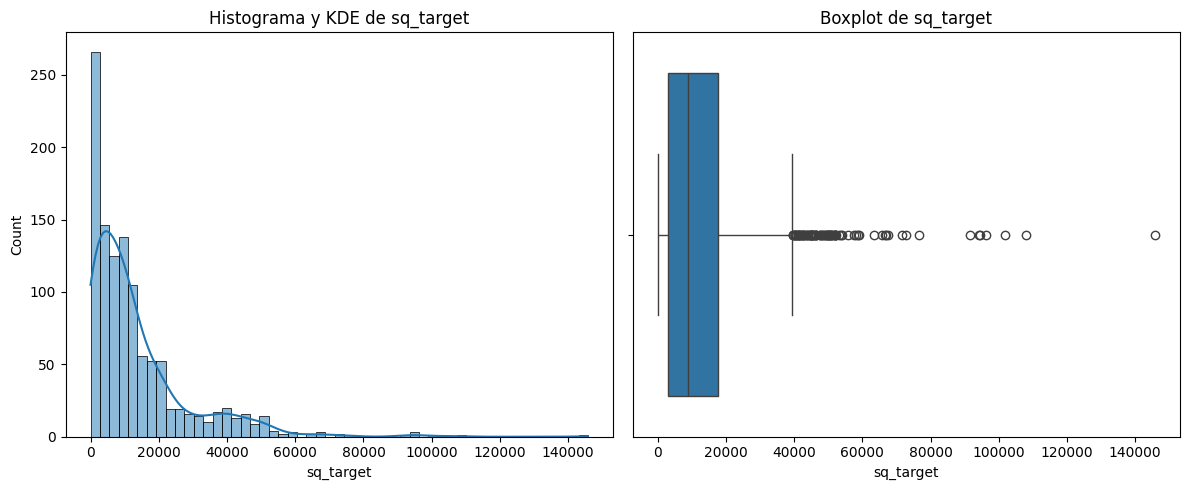

In [53]:
# Veamos como se distribuye el target con transformación cuadrática
train_set_copy['sq_target'] = np.square(train_set['target'])
bt.plot_combined_graphs(train_set_copy, ['sq_target'])

(2,)


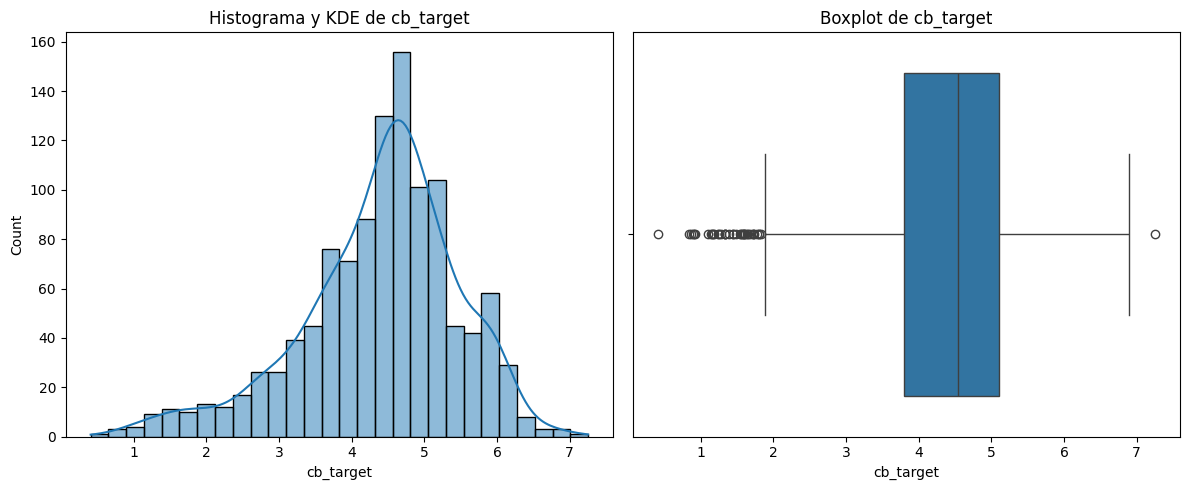

In [54]:
# Veamos como se distribuye el target con transformación cúbica
train_set_copy['cb_target'] = (train_set['target'])**(1/3)
bt.plot_combined_graphs(train_set_copy, ['cb_target'])

Probamos por último la transformación de Box-Cox:

(2,)


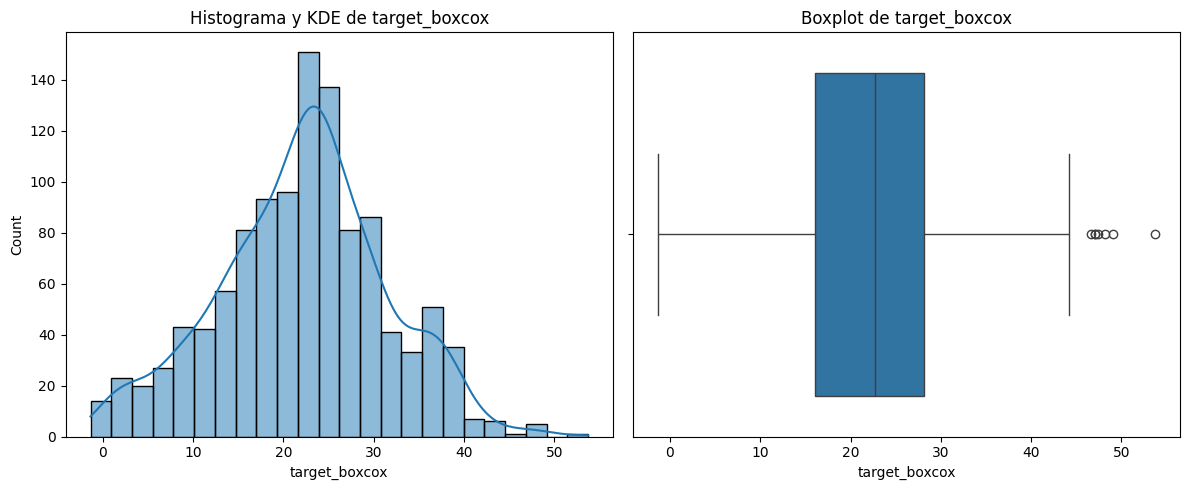

In [55]:
# Por último probamos con box-cox
train_set_copy['target_boxcox'], lambda_opt = boxcox(train_set_copy['target'])
bt.plot_combined_graphs(train_set_copy, ['target_boxcox'])

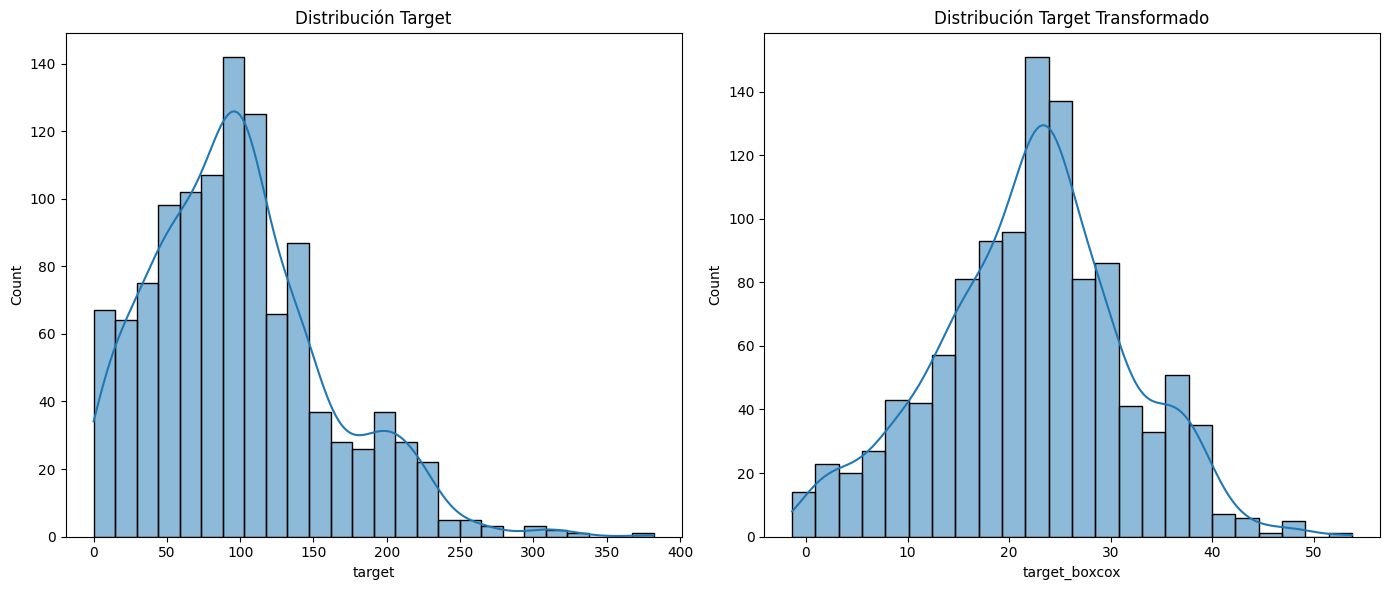

In [56]:
# Comparamos Box-Cox con el original:

fig, (ax1, ax2) = plt.subplots(
    nrows=1, 
    ncols=2, 
    figsize=(14, 6))

sns.histplot(train_set['target'], kde=True, ax=ax1) 
sns.histplot(train_set_copy['target_boxcox'], kde=True, ax=ax2) 
ax1.set_title('Distribución Target')
ax2.set_title('Distribución Target Transformado')
plt.tight_layout() 
plt.show()

#### Parece que la distribución de los datos mejora con una transformación Box-Cox. Será la que escojamos.

### 4.2 Resto de variables:
El resto de variables se refieren a los MWh generados por cada tecnología el día y a las importaciones/exportaciones con los paises 
vecinos:
Energía eolica
Energía nuclear
Energía carbón
Energía ciclo combinado
Energía hidraulica
Energía solar fotovoltaica
Energía solar termica
Energía cogeneración
Exportacion Andorra
Exportacion Marruecos
Exportacion Portugal
Exportacion Francia
Importacion Francia
Importacion Portugal
Importacion Marruecos
Importacion Andorra

Vamos a generar gráficos univariables para ver la distribución que tienen.

(16, 2)


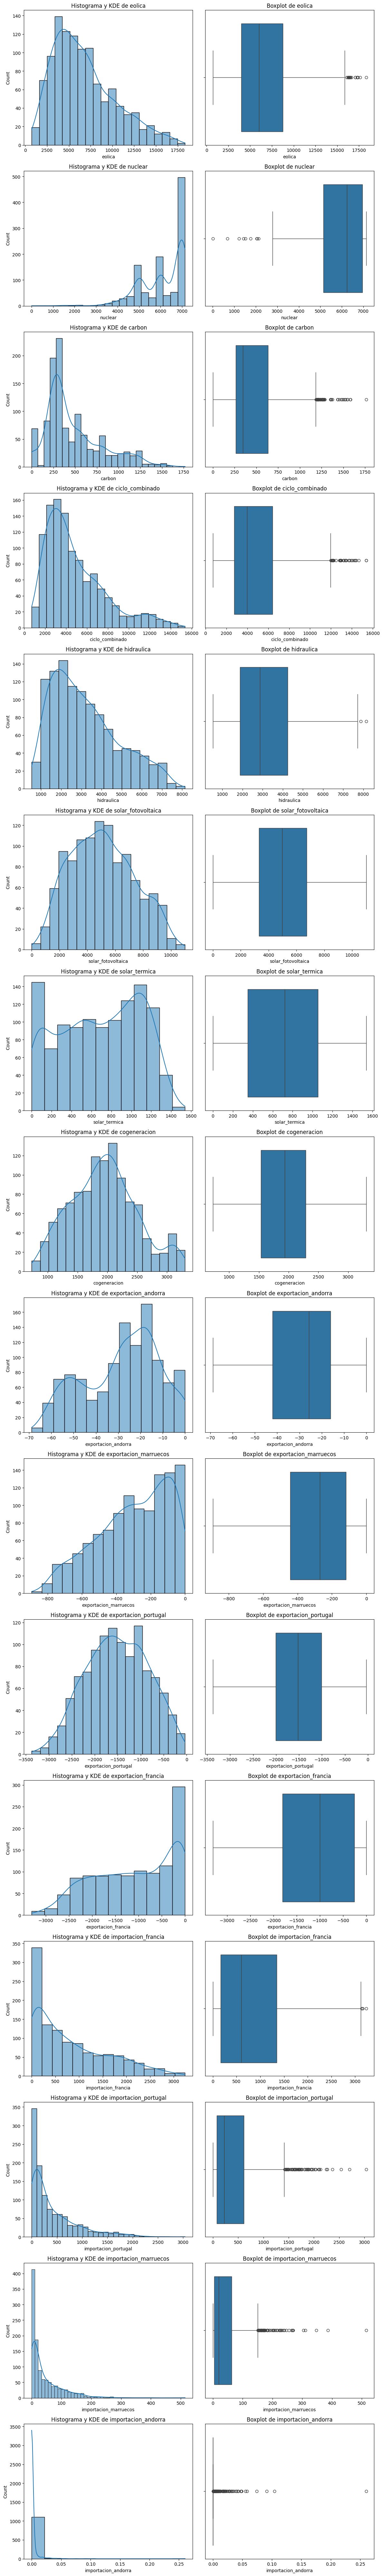

In [57]:
# Graficos para el resto de variables
bt.plot_combined_graphs(train_set, [col for col in train_set.columns if col != 'target'])

Todas las variables son numéricas continuas.

<div id='id5' />

# 5. Análisis bivariable
Vamos a realizar una matriz de correlación para ver las variables que más influyen en el target.

<Axes: >

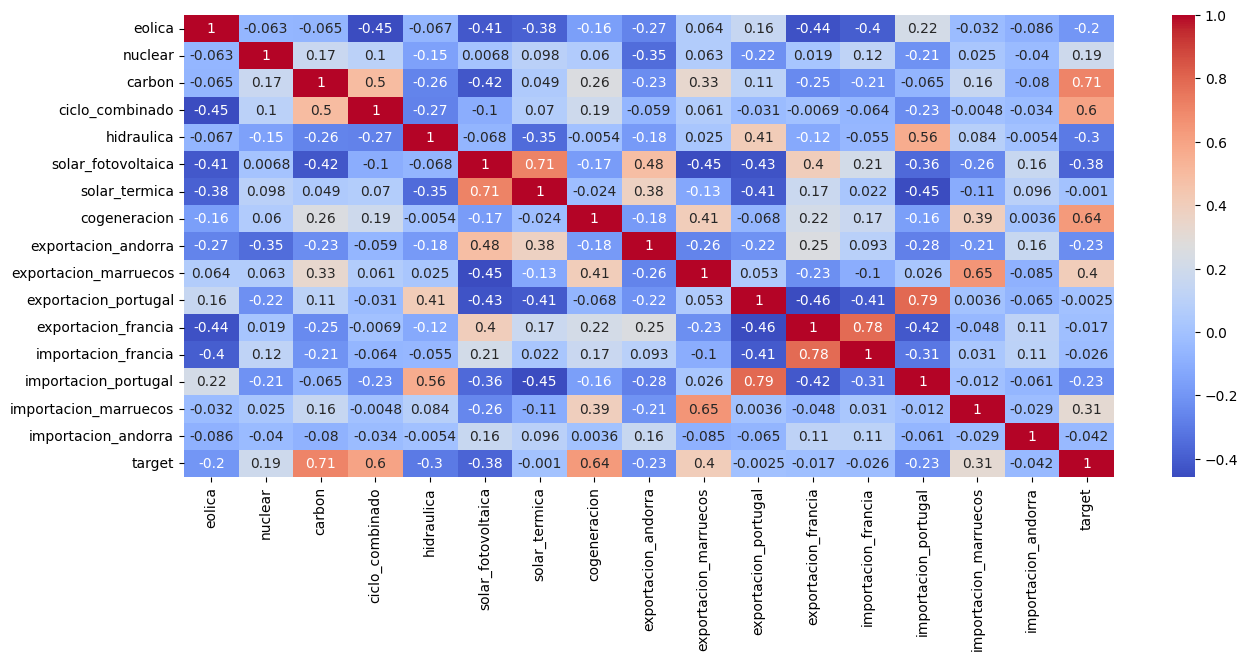

In [58]:
# Matriz de correlación
plt.figure(figsize=(15,6))
sns.heatmap(train_set.corr(), annot=True, cmap='coolwarm')

In [59]:
# Variables ordenadas por correlación
train_set.corr()['target'].sort_values(ascending=False).round(2)

target                   1.00
carbon                   0.71
cogeneracion             0.64
ciclo_combinado          0.60
exportacion_marruecos    0.40
importacion_marruecos    0.31
nuclear                  0.19
solar_termica           -0.00
exportacion_portugal    -0.00
exportacion_francia     -0.02
importacion_francia     -0.03
importacion_andorra     -0.04
eolica                  -0.20
importacion_portugal    -0.23
exportacion_andorra     -0.23
hidraulica              -0.30
solar_fotovoltaica      -0.38
Name: target, dtype: float64

Tenemos variables que influyen incrementando el precio:
- Carbón
- Cogeneración
- Ciclo combinado
- Exportaciones e importaciones a Marruecos
Otras que influyen en el precio disminuyendolo:
- Solar fotovoltaica
- Hidráulica

La colclusión que podemos extraer de esto es que **cuando se recurre a energías no renovables, el precio sube**.

Vamos a pasar los números a valores absolutos para ver el orden de influencia, independientemente de que esta sea positiva o negativa:

In [60]:
# Variables ordenadas por correlación v.abs
train_set.corr()['target'].abs().sort_values(ascending=False)

target                   1.000000
carbon                   0.706147
cogeneracion             0.635592
ciclo_combinado          0.598101
exportacion_marruecos    0.403786
solar_fotovoltaica       0.377129
importacion_marruecos    0.311700
hidraulica               0.300281
exportacion_andorra      0.232501
importacion_portugal     0.229958
eolica                   0.196252
nuclear                  0.186534
importacion_andorra      0.042369
importacion_francia      0.026162
exportacion_francia      0.016992
exportacion_portugal     0.002542
solar_termica            0.001042
Name: target, dtype: float64

<div id='id6' />

## 6. Tratamiento de Outliers
En la grafica de boxplots del target pudimos ver que existen outliers a la derecha. Para mejorar nuestro modelo vamos a descartar outliers ya que no queremos aprender de ellos. 
No queremos aprender de días puntuales en los que el precio fué inusualmente alto por alguna circunstancia, queremos que funcione en el día a día.  
Quitaremos los que superen 2 veces la distancia intercuartil por la derecha.

In [61]:
Q1 = train_set['target'].quantile(0.25)
Q3 = train_set['target'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3+2*IQR

# ¿Cuantos outliers hay?
print( "Número de outliers:", len(train_set[(train_set['target'] >= upper)]) )
train_set[(train_set['target'] >= upper)]

Número de outliers: 7


,eolica,nuclear,carbon,ciclo_combinado,hidraulica,solar_fotovoltaica,solar_termica,cogeneracion,exportacion_andorra,exportacion_marruecos,exportacion_portugal,exportacion_francia,importacion_francia,importacion_portugal,importacion_marruecos,importacion_andorra,target
48,5110.992041,5285.973250,1004.281542,6697.536333,3807.644881,1516.647645,439.980111,3121.300958,-58.395833,-28.512500,-315.597250,-2161.564542,33.065083,1093.987833,230.616667,0.0,318.935833
47,3483.920391,6057.024833,1114.423083,9292.398500,4371.621518,1296.613542,308.118673,3159.702952,-58.762083,-28.866667,-1055.678458,-1628.167208,312.862167,331.973667,155.308333,0.0,307.392083
45,6167.297245,5232.129625,1353.188625,10495.403667,3811.820542,1672.613541,477.651355,3209.998250,-52.406250,-72.204167,-772.211750,-1608.748042,75.866708,834.071500,69.754167,0.0,302.410417
52,6750.565545,6084.273333,1030.114667,8847.479083,4023.540708,526.980897,44.866083,3148.849083,-54.417083,-33.591667,-939.113708,-2398.829167,13.046708,712.223083,127.483333,0.0,381.880000
46,4733.393516,5707.367917,1113.465542,11403.412917,4078.352629,1634.252214,386.577955,3256.144667,-52.666667,-26.437500,-1137.414542,-1446.284667,298.887708,270.493958,120.295833,0.0,310.065417
50,5479.694669,5795.857500,862.781458,10873.487042,4710.985566,920.807609,5.664556,3221.684083,-55.790000,-154.950000,-703.077083,-2246.082292,1.565375,917.466375,59.487500,0.0,328.624583
53,8258.201121,6099.383375,1117.217375,4084.991667,2880.420958,691.163194,44.358167,2531.273378,-52.221250,-23.350000,-725.080500,-1332.910292,253.422083,1115.563917,112.866667,0.0,306.935000


In [62]:
# Los quitamos y guardamos el dataset limpio 
train_set = train_set[(train_set['target'] <= upper)]
train_set.to_csv('../data/train/train_set.csv')